In [1]:
import os
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

# Collecting Raw Data

In [2]:
RED_PATH = os.path.join("winequality-red.csv")
WHITE_PATH = os.path.join("winequality-white.csv")

def load_whitewine_data(wine_path=WHITE_PATH):
    return pd.read_csv(wine_path, sep=';')

def load_redwine_data(wine_path=RED_PATH):
    return pd.read_csv(wine_path, sep=';')

In [3]:
whitewine_data = load_whitewine_data()
redwine_data = load_redwine_data()

# Preparing the Data

In [4]:
df1 = whitewine_data
df1 = df1.assign(Type = 'White')
df2 = redwine_data
df2 = df2.assign(Type = 'Red')
wine_data = df1.append(df2, ignore_index = True) 

# Analyzing the Data

### Summarizing the Data:

In [5]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Feature Correlation:

- Multivariate Analysis

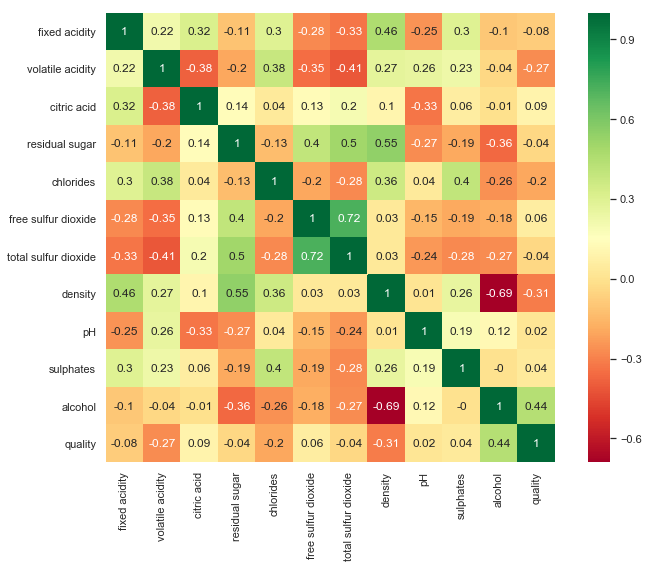

In [6]:
# correlation matrix of all variables

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(wine_data.corr().round(2), square=True, cmap='RdYlGn', annot=True)

### Histograms:

- Univariate analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1ace3208>,
      dtype=object)

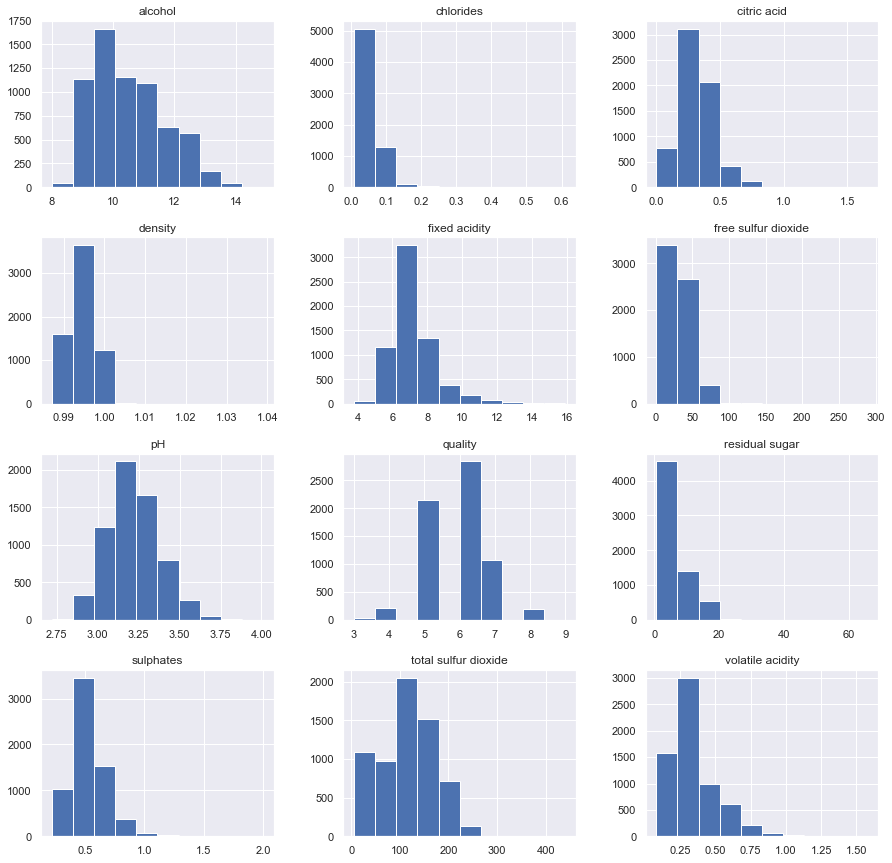

In [7]:
wine_data.hist(bins=10, figsize=(15, 15))

### Splitting into Training and Test Sets:

In [8]:
X = wine_data.drop(['Type'], 1).values

Y = wine_data['Type'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# ML Measurement:

In [9]:
def measure(confusion_matrix, beta=1.0):
    
    tn, fp, fn, tp = confusion_matrix.ravel()
    
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    sensitivity = tp / (tp + fn)
    specificity = tn / (fp + tn)
    precision = tp / (tp + fp)
    f1score = ( (beta**2 + 1) * precision * sensitivity) / (beta**2 * precision + sensitivity)
    auc = (sensitivity + specificity) / 2
    youdens_index = sensitivity - (1 - specificity)
    p_plus = sensitivity / (1 - specificity)
    p_minus = (1 - sensitivity) / specificity
    dp = (np.sqrt(3) / np.pi) * (np.log(sensitivity/(1 - sensitivity) + np.log(specificity/(1 - specificity))))

    print(f"True positives:\t{tp}\t(White\tTrue)")
    print(f"True negatives:\t{tn}\t(Red\tTrue)")
    print(f"False positives:{fp}\t(White\tFalse)")
    print(f"False negatives:{fn}\t(Red\tFalse)")
    print(f"-------------------------------------")
    print(f"accuracy:\t\t {accuracy:3.3f}")
    print(f"sensitivity:\t\t {sensitivity:3.3f}")
    print(f"specificity:\t\t {specificity:3.3f}")
    print(f"precision:\t\t {precision:3.3f}")
    print(f"youdens_index:\t\t {youdens_index:3.3f}")
    print(f"f1score:\t\t {f1score:3.3f}")
    print(f"AUC:\t\t\t {auc:3.3f}")
    print(f"p+:\t\t\t{p_plus:3.3f}")
    print(f"P-:\t\t\t {p_minus:3.3f}")
    print(f"DP:\t\t\t {dp:3.3f}")

# Model Training:

### Decision Tree

In [10]:
# Instantiate model and train it on the data:
model = DecisionTreeClassifier(random_state=42,
                              )
model.fit(X_train, Y_train)

# Make Predictions:
ground_truth = Y_test
approximation = model.predict(X_test)

# Save results in confusion matrix (Np.Array):
confusion_matrix_dt = metrics.confusion_matrix(ground_truth, approximation)
print(model)
print(f"Mean Accuracy Train:\t{model.score(X_train, Y_train):3.3f}")
print(f"Mean Accuracy Test:\t{model.score(X_test, Y_test):3.3f}")

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')
Mean Accuracy Train:	1.000
Mean Accuracy Test:	0.991


### Random Forest

In [11]:
# Instantiate model and train it on the data:
model = RandomForestClassifier(random_state=42, 
                               n_estimators=10,
                               #verbose=1
                              )
model.fit(X_train, Y_train)

# Make Predictions:
ground_truth = Y_test
approximation = model.predict(X_test)

# Save results in confusion matrix (Np.Array):
confusion_matrix_rf = metrics.confusion_matrix(ground_truth, approximation)
print(model)
print(f"Mean Accuracy Train:\t{model.score(X_train, Y_train):3.3f}")
print(f"Mean Accuracy Test:\t{model.score(X_test, Y_test):3.3f}")

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
Mean Accuracy Train:	0.999
Mean Accuracy Test:	0.994


### MLP Neural Network

In [12]:
# Instantiate model and train it on the data:
model = MLPClassifier(random_state=42,
                      alpha=0.0001,
                      hidden_layer_sizes=(10,10),
                      activation='tanh',
                      #solver='lbfgs',
                      #verbose=1
                     )

model.fit(X_train, Y_train)

# Make Predictions:
ground_truth = Y_test
approximation = model.predict(X_test)

# Save results in confusion matrix (Np.Array):
confusion_matrix_nn = metrics.confusion_matrix(ground_truth, approximation)
print(model)
print(f"Mean Accuracy Train:\t{model.score(X_train, Y_train):3.3f}")
print(f"Mean Accuracy Test:\t{model.score(X_test, Y_test):3.3f}")

MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
Mean Accuracy Train:	0.987
Mean Accuracy Test:	0.985


# Results:

### Decision Tree

Text(5.660000000000002, 0.5, 'Predicted')

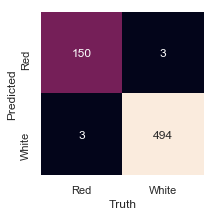

In [13]:
# Plot Confusion Matrix
mat = confusion_matrix_dt
names = np.unique(approximation)
sns.set(rc={'figure.figsize':(3,3)})
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [14]:
# Compute Measurements
measure(confusion_matrix_dt)

True positives:	494	(White	True)
True negatives:	150	(Red	True)
False positives:3	(White	False)
False negatives:3	(Red	False)
-------------------------------------
accuracy:		 0.991
sensitivity:		 0.994
specificity:		 0.980
precision:		 0.994
youdens_index:		 0.974
f1score:		 0.994
AUC:			 0.987
p+:			50.692
P-:			 0.006
DP:			 2.827


### Random Forest

Text(5.660000000000002, 0.5, 'Predicted')

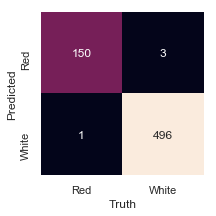

In [15]:
# Plot Confusion Matrix
mat = confusion_matrix_rf
names = np.unique(approximation)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [16]:
# Compute Measurements
measure(confusion_matrix_rf)

True positives:	496	(White	True)
True negatives:	150	(Red	True)
False positives:3	(White	False)
False negatives:1	(Red	False)
-------------------------------------
accuracy:		 0.994
sensitivity:		 0.998
specificity:		 0.980
precision:		 0.994
youdens_index:		 0.978
f1score:		 0.996
AUC:			 0.989
p+:			50.897
P-:			 0.002
DP:			 3.426


### MLP Neural Network

Text(5.660000000000002, 0.5, 'Predicted')

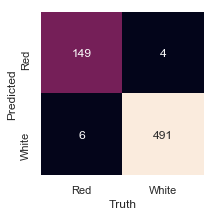

In [17]:
# Plot Confusion Matrix
mat = confusion_matrix_nn
names = np.unique(approximation)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [18]:
# Compute Measurements
measure(confusion_matrix_nn)

True positives:	491	(White	True)
True negatives:	149	(Red	True)
False positives:4	(White	False)
False negatives:6	(Red	False)
-------------------------------------
accuracy:		 0.985
sensitivity:		 0.988
specificity:		 0.974
precision:		 0.992
youdens_index:		 0.962
f1score:		 0.990
AUC:			 0.981
p+:			37.788
P-:			 0.012
DP:			 2.452
